In [1]:
import os
import re

import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import torch
from gensim.models import Word2Vec
from gensim.parsing import remove_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

d:\python\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
from sklearn.svm import SVC
from torchtext import vocab

columns = ["ProductName", "level_1", "level_2", "level_3", "PricePerItem", "PriceMode", "HasMultiBuyDeal",
           "MultiBuyDeal", "MultiBuyBasePrice", "MultiBuyPrice", "MultiBuyQuantity", "PromoBadgeImageLabel"]
df = pd.read_csv("data.csv", usecols=columns)
df.drop_duplicates(inplace=True)
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,Johnson's Baby Lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
1,Johnson's Baby Oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
2,SMA Balanced Nutrition From Birth Infant Formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,NaN,17.99,17.99,1.0,Saver
3,Johnson's Baby Powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,NaN,2.99,2.99,1.0,Saver
4,Johnson's Baby Powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,NaN,4.89,NaN,NaN,NaN


In [3]:
punctuations = re.compile(r'[^a-zA-Z\s]+')
df["ProductName"] = [" ".join(punctuations.sub('', x).lower().split()) for x in df["ProductName"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,johnsons baby lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
1,johnsons baby oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
2,sma balanced nutrition from birth infant formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,NaN,17.99,17.99,1.0,Saver
3,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,NaN,2.99,2.99,1.0,Saver
4,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,NaN,4.89,NaN,NaN,NaN


In [4]:
df["MultiBuyDeal"] = [" ".join(punctuations.sub('', y).lower().split()) if y == y else " " for y in
                      df["MultiBuyDeal"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,johnsons baby lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,NaN,NaN,NaN
1,johnsons baby oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,NaN,NaN,NaN
2,sma balanced nutrition from birth infant formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,,17.99,17.99,1.0,Saver
3,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,,2.99,2.99,1.0,Saver
4,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,,4.89,NaN,NaN,NaN


In [5]:
df["PromoBadgeImageLabel"] = [" ".join(punctuations.sub('', z).lower().split()) if z == z else " " for z in
                              df["PromoBadgeImageLabel"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,johnsons baby lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,NaN,NaN,
1,johnsons baby oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,NaN,NaN,
2,sma balanced nutrition from birth infant formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,,17.99,17.99,1.0,saver
3,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,,2.99,2.99,1.0,saver
4,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,,4.89,NaN,NaN,


In [6]:
df["MultiBuyPrice"].fillna(0, inplace=True)
df["MultiBuyQuantity"].fillna(0, inplace=True)
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,johnsons baby lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,0.00,0.0,
1,johnsons baby oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,0.00,0.0,
2,sma balanced nutrition from birth infant formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,,17.99,17.99,1.0,saver
3,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,,2.99,2.99,1.0,saver
4,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,,4.89,0.00,0.0,


<BarContainer object of 449 artists>

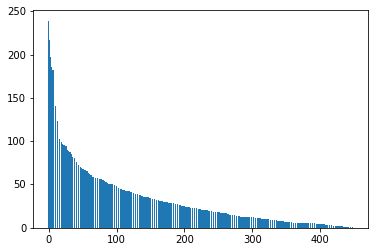

In [7]:
typesa = df.value_counts(columns[1:4])
plot.bar([a for a in range(typesa.size)], typesa)

<BarContainer object of 43 artists>

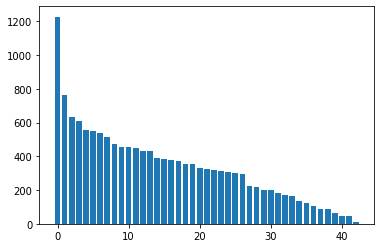

In [8]:
typesb = df.value_counts(columns[1:3])
plot.bar([a for a in range(typesb.size)], typesb)

In [9]:
typesc = df.value_counts(columns[1:2])
typesc

level_1                    
Pantry                         4740
Personal Care                  1778
Fresh Foods & Bakery           1721
Chilled, Frozen & Desserts     1426
Beer, Cider & Wine             1232
Kitchen, Dining & Household    1182
Drinks                         1063
Pets                            512
Meal Spot                       456
Baby, Toddler & Kids            354
Featured                        121
dtype: int64

In [10]:
df = df[df["level_1"] != "Featured"]
df = df[df["level_1"] != "Meal Spot"]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,johnsons baby lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,0.00,0.0,
1,johnsons baby oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,,4.89,0.00,0.0,
2,sma balanced nutrition from birth infant formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,,17.99,17.99,1.0,saver
3,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,,2.99,2.99,1.0,saver
4,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,,4.89,0.00,0.0,


(array([1.856e+03, 4.425e+03, 3.087e+03, 1.348e+03, 9.700e+02, 5.280e+02,
        5.470e+02, 1.880e+02, 2.160e+02, 1.670e+02, 1.250e+02, 7.600e+01,
        2.800e+01, 2.000e+01, 2.800e+01, 1.200e+01, 2.200e+01, 6.000e+00,
        1.200e+01, 1.000e+00, 1.200e+01, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.15  ,   2.5668,   4.9836,   7.4004,   9.8172,  12.234 ,
         14.6508,  17.0676,  19.4844,  21.9012,  24.318 ,  26.7348,
         29.1516,  31.5684,  33.9852,  36.402 ,  38.8188,  41.2356,
         43.6524,  46.0692,  48.486 ,  50.9028,  53.3196,  55.7364,
         58.1532,  60.57  ,  62.9868,  65.4036,  67.8204,  70.2372,
         72.654 ,  75.0708,  77.4876

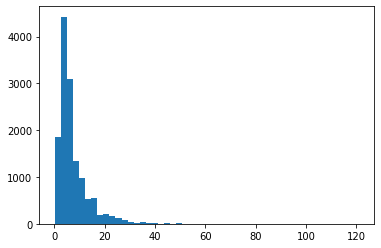

In [11]:
dfea = df[df["PriceMode"] == "ea"]
plot.hist(dfea["PricePerItem"].tolist(), bins=50)

(array([13., 21., 22., 13., 21., 29., 30.,  9., 37., 19., 39.,  9.,  9.,
        14.,  9.,  1.,  3.,  3.,  7.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.29  ,   4.8422,   7.3944,   9.9466,  12.4988,  15.051 ,
         17.6032,  20.1554,  22.7076,  25.2598,  27.812 ,  30.3642,
         32.9164,  35.4686,  38.0208,  40.573 ,  43.1252,  45.6774,
         48.2296,  50.7818,  53.334 ,  55.8862,  58.4384,  60.9906,
         63.5428,  66.095 ,  68.6472,  71.1994,  73.7516,  76.3038,
         78.856 ,  81.4082,  83.9604,  86.5126,  89.0648,  91.617 ,
         94.1692,  96.7214,  99.2736, 101.8258, 104.378 , 106.9302,
        109.4824, 112.0346, 114.5868, 117.139 , 119.6912, 122.2434,
        124.7956, 127.3478, 129.9   ]),
 <BarContainer object of 50 artists>)

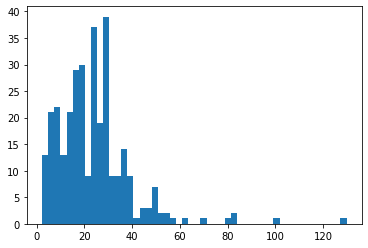

In [12]:
dfkg = df[df["PriceMode"] == "kg"]
plot.hist(dfkg["PricePerItem"].tolist(), bins=50)

In [13]:
df["PricePerItem"] = [round(p / 5) * 5 for p in df["PricePerItem"].tolist()]
df["MultiBuyPrice"] = [round(p / 5) * 5 for p in df["MultiBuyPrice"].tolist()]
df["MultiBuyBasePrice"] = [round(p / 5) * 5 for p in df["MultiBuyBasePrice"].tolist()]
df["MultiBuyQuantity"] = [int(q) for q in df["MultiBuyQuantity"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,johnsons baby lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,5,ea,False,,5,0,0,
1,johnsons baby oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,5,ea,False,,5,0,0,
2,sma balanced nutrition from birth infant formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,20,ea,False,,20,20,1,saver
3,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,5,ea,False,,5,5,1,saver
4,johnsons baby powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,5,ea,False,,5,0,0,


In [14]:
levela = df["level_1"].tolist()
levelb = df["level_2"].tolist()
two = [";".join([levela[i], levelb[i]]) for i in range(len(levela))]
one = levela

In [15]:
texts = df["ProductName"].tolist()
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(texts)

In [16]:
label2idtwo = {l: i for i, l in enumerate(set(two))}
id2labeltwo = {i: l for l, i in label2idtwo.items()}
two = [label2idtwo[l] for l in two]
label2idone = {l: i for i, l in enumerate(set(one))}
id2labelone = {i: l for l, i in label2idone.items()}
one = [label2idone[l] for l in one]
x_traint, x_testt, y_traint, y_testt = train_test_split(features, two, test_size=0.25, random_state=3)
x_traino, x_testo, y_traino, y_testo = train_test_split(features, one, test_size=0.25, random_state=3)

In [17]:
model = LogisticRegression(max_iter=500)
model.fit(x_traint, y_traint)
predict_labelst = model.predict(x_testt)
predict_labelst = [np.round(p) for p in predict_labelst]
max_labelt = len(id2labeltwo) - 1
predict_labelst = [l if max_labelt >= l else max_labelt for l in predict_labelst]
min_label = 0
predict_labelst = [l if min_label <= l else min_label for l in predict_labelst]
print(classification_report(y_testt, predict_labelst, target_names=[id2labeltwo[i] for i in range(len(id2labeltwo))]))

In [18]:
model = LogisticRegression(max_iter=500)
model.fit(x_traino, y_traino)
predict_labelso = model.predict(x_testo)
predict_labelso = [np.round(p) for p in predict_labelso]
max_labelo = len(id2labelone) - 1
predict_labelso = [l if max_labelo >= l else max_labelo for l in predict_labelso]
min_label = 0
predict_labelso = [l if min_label <= l else min_label for l in predict_labelso]
print(classification_report(y_testo, predict_labelso, target_names=[id2labelone[i] for i in range(len(id2labelone))]))

In [19]:
k = len(id2labeltwo)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_traint, y_traint)
predict_labelst = model.predict(x_testt)
print(classification_report(y_testt, predict_labelst, target_names=[id2labeltwo[i] for i in range(len(id2labeltwo))]))

In [20]:
k = len(id2labelone)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_traino, y_traino)
predict_labelso = model.predict(x_testo)
print(classification_report(y_testo, predict_labelso, target_names=[id2labelone[i] for i in range(len(id2labelone))]))

In [21]:
def knn_cross_validation(x_train, y_train):
    k_list = list(range(1, 30))
    list_scores = []

    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
        list_scores.append(scores.mean())

    MSE = [1 - x for x in list_scores]
    optimal_k = k_list[MSE.index(min(MSE))]
    print("The optimal number of neighbors is %d" % optimal_k)
    plot.plot(k_list, list_scores)
    plot.xlabel('Number of Neighbors K')
    plot.ylabel('correct classification rate')
    plot.show()
    return optimal_k

In [22]:
ko = knn_cross_validation(x_traino, y_traino)

In [23]:
kt = knn_cross_validation(x_traint, y_traint)

In [24]:
knn = KNeighborsClassifier(n_neighbors=kt)
train_sizes, train_score, test_score = learning_curve(knn, features, two, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                      cv=5, scoring='accuracy')
train_error = 1 - np.mean(train_score, axis=1)
test_error = 1 - np.mean(test_score, axis=1)
plot.plot(train_sizes, train_error, 'o-', color='r', label='training')
plot.plot(train_sizes, test_error, 'o-', color='g', label='testing')
plot.legend(loc='best')
plot.xlabel('traing examples')
plot.ylabel('error')
plot.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=ko)
train_sizes, train_score, test_score = learning_curve(knn, features, one, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                      cv=5, scoring='accuracy')
train_error = 1 - np.mean(train_score, axis=1)
test_error = 1 - np.mean(test_score, axis=1)
plot.plot(train_sizes, train_error, 'o-', color='r', label='training')
plot.plot(train_sizes, test_error, 'o-', color='g', label='testing')
plot.legend(loc='best')
plot.xlabel('traing examples')
plot.ylabel('error')
plot.show()

In [26]:
model = OneVsRestClassifier(SVC())
model.fit(x_traint, y_traint)
svm_predict_labelst = model.predict(x_testt)
print(
    classification_report(y_testt, svm_predict_labelst, target_names=[id2labeltwo[i] for i in range(len(id2labeltwo))]))

In [27]:
train_sizes, train_score, test_score = learning_curve(SVC(), features, two, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                      cv=5, scoring='accuracy')
train_error = 1 - np.mean(train_score, axis=1)
test_error = 1 - np.mean(test_score, axis=1)
plot.plot(train_sizes, train_error, 'o-', color='r', label='training')
plot.plot(train_sizes, test_error, 'o-', color='g', label='testing')
plot.legend(loc='best')
plot.xlabel('traing examples')
plot.ylabel('error')
plot.show()

In [28]:
model = OneVsRestClassifier(SVC())
model.fit(x_traino, y_traino)
svm_predict_labelso = model.predict(x_testo)
print(
    classification_report(y_testo, svm_predict_labelso, target_names=[id2labelone[i] for i in range(len(id2labelone))]))

In [29]:
train_sizes, train_score, test_score = learning_curve(SVC(), features, one, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                      cv=5, scoring='accuracy')
train_error = 1 - np.mean(train_score, axis=1)
test_error = 1 - np.mean(test_score, axis=1)
plot.plot(train_sizes, train_error, 'o-', color='r', label='training')
plot.plot(train_sizes, test_error, 'o-', color='g', label='testing')
plot.legend(loc='best')
plot.xlabel('traing examples')
plot.ylabel('error')
plot.show()

In [30]:
def load_embeddings():
    cache = '.vector_cache'
    if not os.path.exists(cache):
        os.mkdir(cache)
    word2vec = vocab.Vectors(name=r'./word2vec_300dim.txt', cache=cache)
    return word2vec


def encode_text_to_features(vector, text):
    vectors = vector.get_vecs_by_tokens(text.split())
    sentence_vector = torch.mean(vectors, dim=0)
    return sentence_vector.tolist()


sentences = []
map(remove_stopwords, texts)
for i in range(len(texts)):
    sentence = texts[i].split()
    sentence.append(levela[i])
    sentence.append(levelb[i])
    sentences.append(sentence)
w2v = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1)
w2v.wv.save_word2vec_format(r'./word2vec_300dim.txt', binary=False)
vector = load_embeddings()
features = [encode_text_to_features(vector, text) for text in texts]

In [31]:
x_traint, x_testt, y_traint, y_testt = train_test_split(features, two, test_size=0.25, random_state=3)
x_traino, x_testo, y_traino, y_testo = train_test_split(features, one, test_size=0.25, random_state=3)

In [32]:
model = LogisticRegression(max_iter=500)
model.fit(x_traint, y_traint)
predict_labelst = model.predict(x_testt)
predict_labelst = [np.round(p) for p in predict_labelst]
max_labelt = len(id2labeltwo) - 1
predict_labelst = [l if max_labelt >= l else max_labelt for l in predict_labelst]
min_label = 0
predict_labelst = [l if min_label <= l else min_label for l in predict_labelst]
print(classification_report(y_testt, predict_labelst, target_names=[id2labeltwo[i] for i in range(len(id2labeltwo))]))

                                                        precision    recall  f1-score   support

                         Pantry;Condiments & Dressings       0.00      0.00      0.00        75
               Fresh Foods & Bakery;Bulk & Loose Foods       1.00      0.50      0.67        34
                                    Pantry;Snack Foods       0.46      0.05      0.09       121
                                     Pets;Pet Supplies       0.58      0.66      0.62       141
                                  Pantry;Confectionery       0.65      0.20      0.30       101
                                    Drinks;Cold Drinks       0.57      0.75      0.65       155
                        Pantry;Baking Supplies & Sugar       0.00      0.00      0.00        96
                        Fresh Foods & Bakery;Meal Kits       0.00      0.00      0.00         5
                       Personal Care;Beauty & Grooming       0.13      0.92      0.23       282
                       Personal Care;He

d:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
model = LogisticRegression(max_iter=500)
model.fit(x_traino, y_traino)
predict_labelso = model.predict(x_testo)
predict_labelso = [np.round(p) for p in predict_labelso]
max_labelo = len(id2labelone) - 1
predict_labelso = [l if max_labelo >= l else max_labelo for l in predict_labelso]
min_label = 0
predict_labelst = [l if min_label <= l else min_label for l in predict_labelso]
print(classification_report(y_testo, predict_labelso, target_names=[id2labelone[i] for i in range(len(id2labelone))]))


                             precision    recall  f1-score   support

              Personal Care       0.63      0.23      0.34       440
                     Drinks       0.69      0.41      0.52       249
Kitchen, Dining & Household       0.23      0.13      0.17       263
 Chilled, Frozen & Desserts       0.33      0.04      0.06       368
       Baby, Toddler & Kids       0.00      0.00      0.00        93
                       Pets       1.00      0.37      0.54       141
       Fresh Foods & Bakery       0.96      0.05      0.10       456
         Beer, Cider & Wine       0.99      0.39      0.56       301
                     Pantry       0.40      0.95      0.56      1191

                   accuracy                           0.45      3502
                  macro avg       0.58      0.28      0.32      3502
               weighted avg       0.57      0.45      0.37      3502



d:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
